# Problem statement

Build a Machine learning model for predicting the strength of contrete based on given properties such as cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate etc

# Objective


Using the data available in file concrete_data.xls. Apply feature engineering methods to obtain 85% to
95% accuracy (tolerance limit 95% of the time (confidence level).

# Dataset details

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

# Steps to solve the problem:

#### 1. Load the dataset

#### 2. Explore dataset

#### 3. Check data distribution

#### 4. Check Missing values or zero values

#### 5. Check Correlation among features

#### 6. Check for outliers

#### 7. Training and Testing

#### 8. Hyperparameter tuning

#### 9. Retrain the models after finding feature importance

#### 10. Check for multicollinearity(This is not implemented due to time constaints) 

#### 10. Summary


## Load DataSet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv("concrete.csv")

## Explore Dataset

In [6]:
dataset.count()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

#### There are 1030 records in the dataset

In [7]:
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### In total, there are 9 colmns in the dataset. 

#### All columns are numeric columns

#### Target column is "strength"


## Check data distribution

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Cement:**
Values of cement column are distributed between 102 and 540. There are some higher values exist in the column which caused a long tail at the right side of distribution curve.

**slag:**
Column slag contains 0 values and outliers. We need to analyze these rows separately and try to figure outany pattern exist among them

**ash:**
Column ash contains lots of 0 values. We need to separately analyze this column like we planned for slag.

**water:**
The data distribution looks like there is less chance of possible outliers in this column.

**superplastic:**
This column contains lots of 0 values.

**coarseagg:**
Data in this columns are distributed between 801 and 1129 with a standard distribution of 78. Chance of outliers are less here.

**fineagg:**
Data in this columns are distributed between 594 and 992 with a standard distribution of 80. Chance of outliers are less here either.

**age:**
aga column has very big range from 1 to 355. 

**strength:**
With the above characteristics of different features, strength varies between 2.3 and 82.6


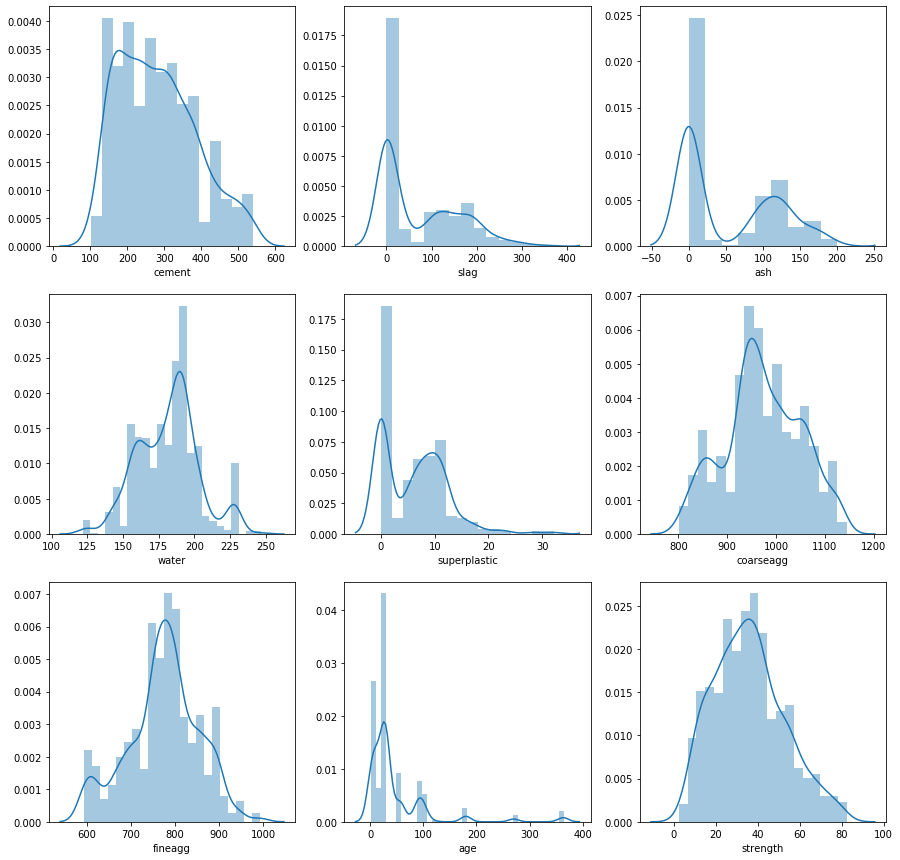

In [30]:
f,axes = plt.subplots(3,3,figsize=(15,15))
sns.distplot(dataset["cement"],ax=axes[0,0])
sns.distplot(dataset["slag"],ax=axes[0,1])
sns.distplot(dataset["ash"],ax=axes[0,2])

sns.distplot(dataset["water"],ax=axes[1,0])
sns.distplot(dataset["superplastic"],ax=axes[1,1])
sns.distplot(dataset["coarseagg"],ax=axes[1,2])

sns.distplot(dataset["fineagg"],ax=axes[2,0])
sns.distplot(dataset["age"],ax=axes[2,1])
sns.distplot(dataset["strength"],ax=axes[2,2])

### Relationship of Independent features with Target

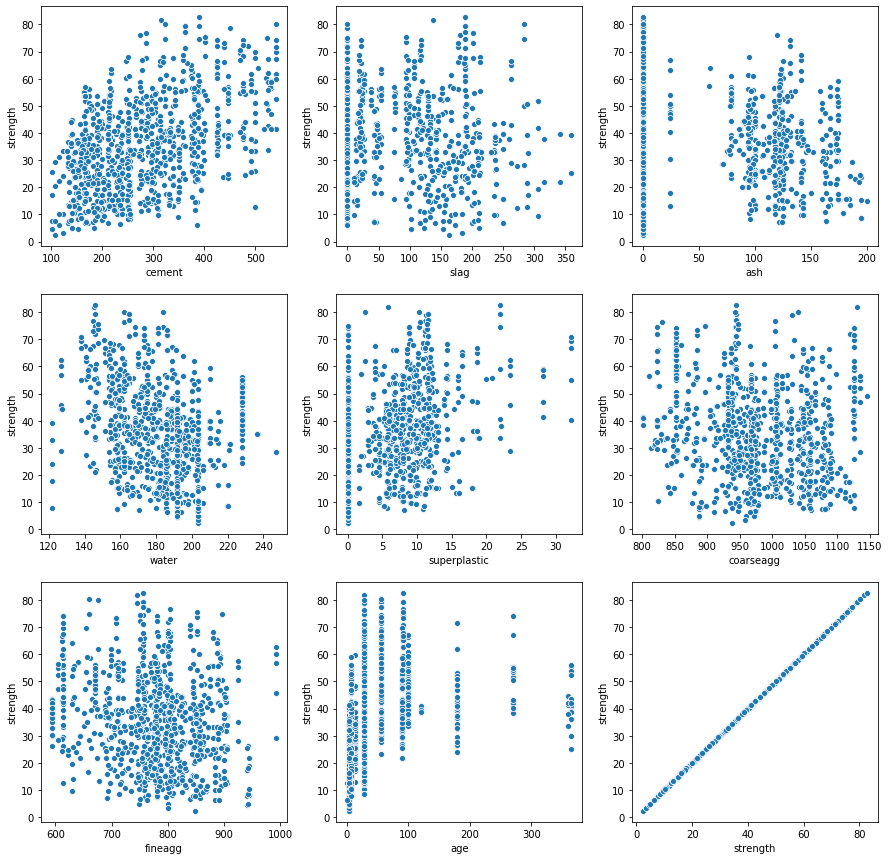

In [31]:
f,axes = plt.subplots(3,3,figsize=(15,15))
sns.scatterplot(dataset["cement"],dataset["strength"],ax=axes[0,0])
sns.scatterplot(dataset["slag"],dataset["strength"],ax=axes[0,1])
sns.scatterplot(dataset["ash"],dataset["strength"],ax=axes[0,2])

sns.scatterplot(dataset["water"],dataset["strength"],ax=axes[1,0])
sns.scatterplot(dataset["superplastic"],dataset["strength"],ax=axes[1,1])
sns.scatterplot(dataset["coarseagg"],dataset["strength"],ax=axes[1,2])

sns.scatterplot(dataset["fineagg"],dataset["strength"],ax=axes[2,0])
sns.scatterplot(dataset["age"],dataset["strength"],ax=axes[2,1])
sns.scatterplot(dataset["strength"],dataset["strength"],ax=axes[2,2])

In [32]:
dataset[(dataset["slag"]>200)].count()

cement          93
slag            93
ash             93
water           93
superplastic    93
coarseagg       93
fineagg         93
age             93
strength        93
dtype: int64

In [37]:
dataset[(dataset["ash"]<80)].count()

cement          607
slag            607
ash             607
water           607
superplastic    607
coarseagg       607
fineagg         607
age             607
strength        607
dtype: int64

In [38]:
dataset[(dataset["water"]>150) & (dataset["water"]<200) ].count()

cement          793
slag            793
ash             793
water           793
superplastic    793
coarseagg       793
fineagg         793
age             793
strength        793
dtype: int64

## Check Missing values or zero values

In [15]:
dataset.loc[(dataset==0).any(axis=1)].count()

cement          805
slag            805
ash             805
water           805
superplastic    805
coarseagg       805
fineagg         805
age             805
strength        805
dtype: int64

**There are 805 rows with 1 or more column containing 0 values**

In [17]:
dataset[(dataset["slag"] == 0)].count()

cement          471
slag            471
ash             471
water           471
superplastic    471
coarseagg       471
fineagg         471
age             471
strength        471
dtype: int64

**More than 45% of records have '0' value for slag column**

In [18]:
dataset[(dataset["ash"] == 0)].count()

cement          566
slag            566
ash             566
water           566
superplastic    566
coarseagg       566
fineagg         566
age             566
strength        566
dtype: int64

**More than 50% of the records have '0' value for ash column**

In [19]:
dataset[(dataset["superplastic"] == 0)].count()

cement          379
slag            379
ash             379
water           379
superplastic    379
coarseagg       379
fineagg         379
age             379
strength        379
dtype: int64

**More than 33% of records have '0' value for superplastic column**

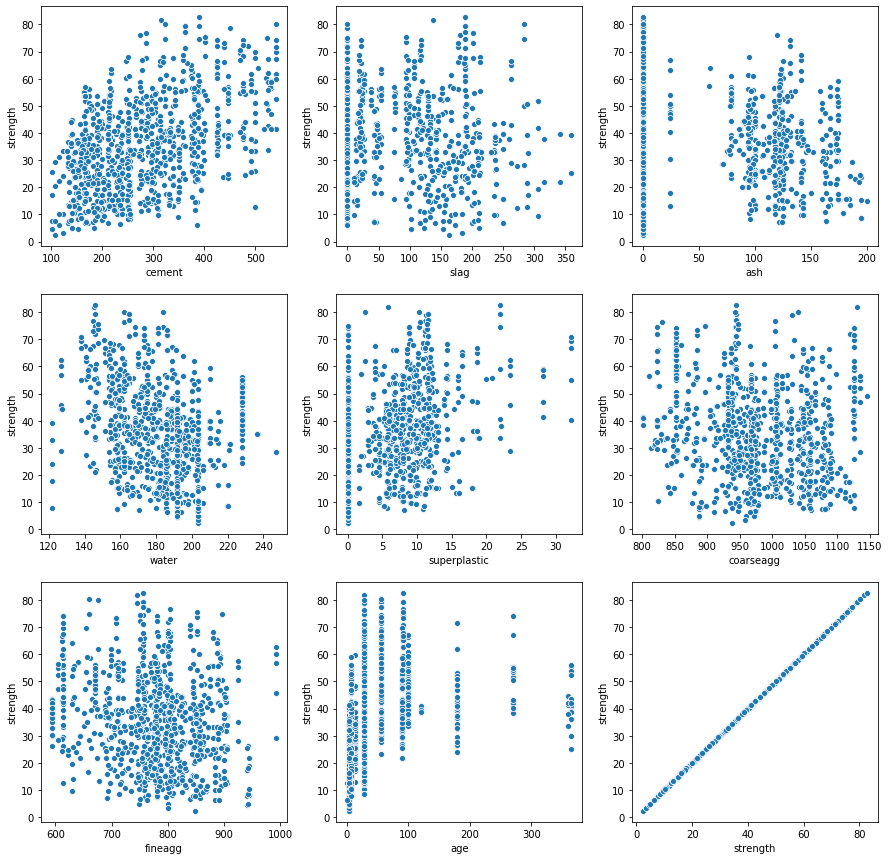

**Cement has linear relationship with strength. However from the plot, it's clear that even if we are adding more cement in the mix, some other factors(impact of other components are affecting the strength)**

**More than 90% of the records have slag value less than 200**

**Around 50% of the records hold '0' value for 'ash. Among the other 50%, more than 45% of records have ash value higher than 80. Moreover, inclusion of ash in the mix is badly impacting the strength in higher values**

**More than 76% of records have water column value greater than 150 and less than 200**


## Check Correlation among features

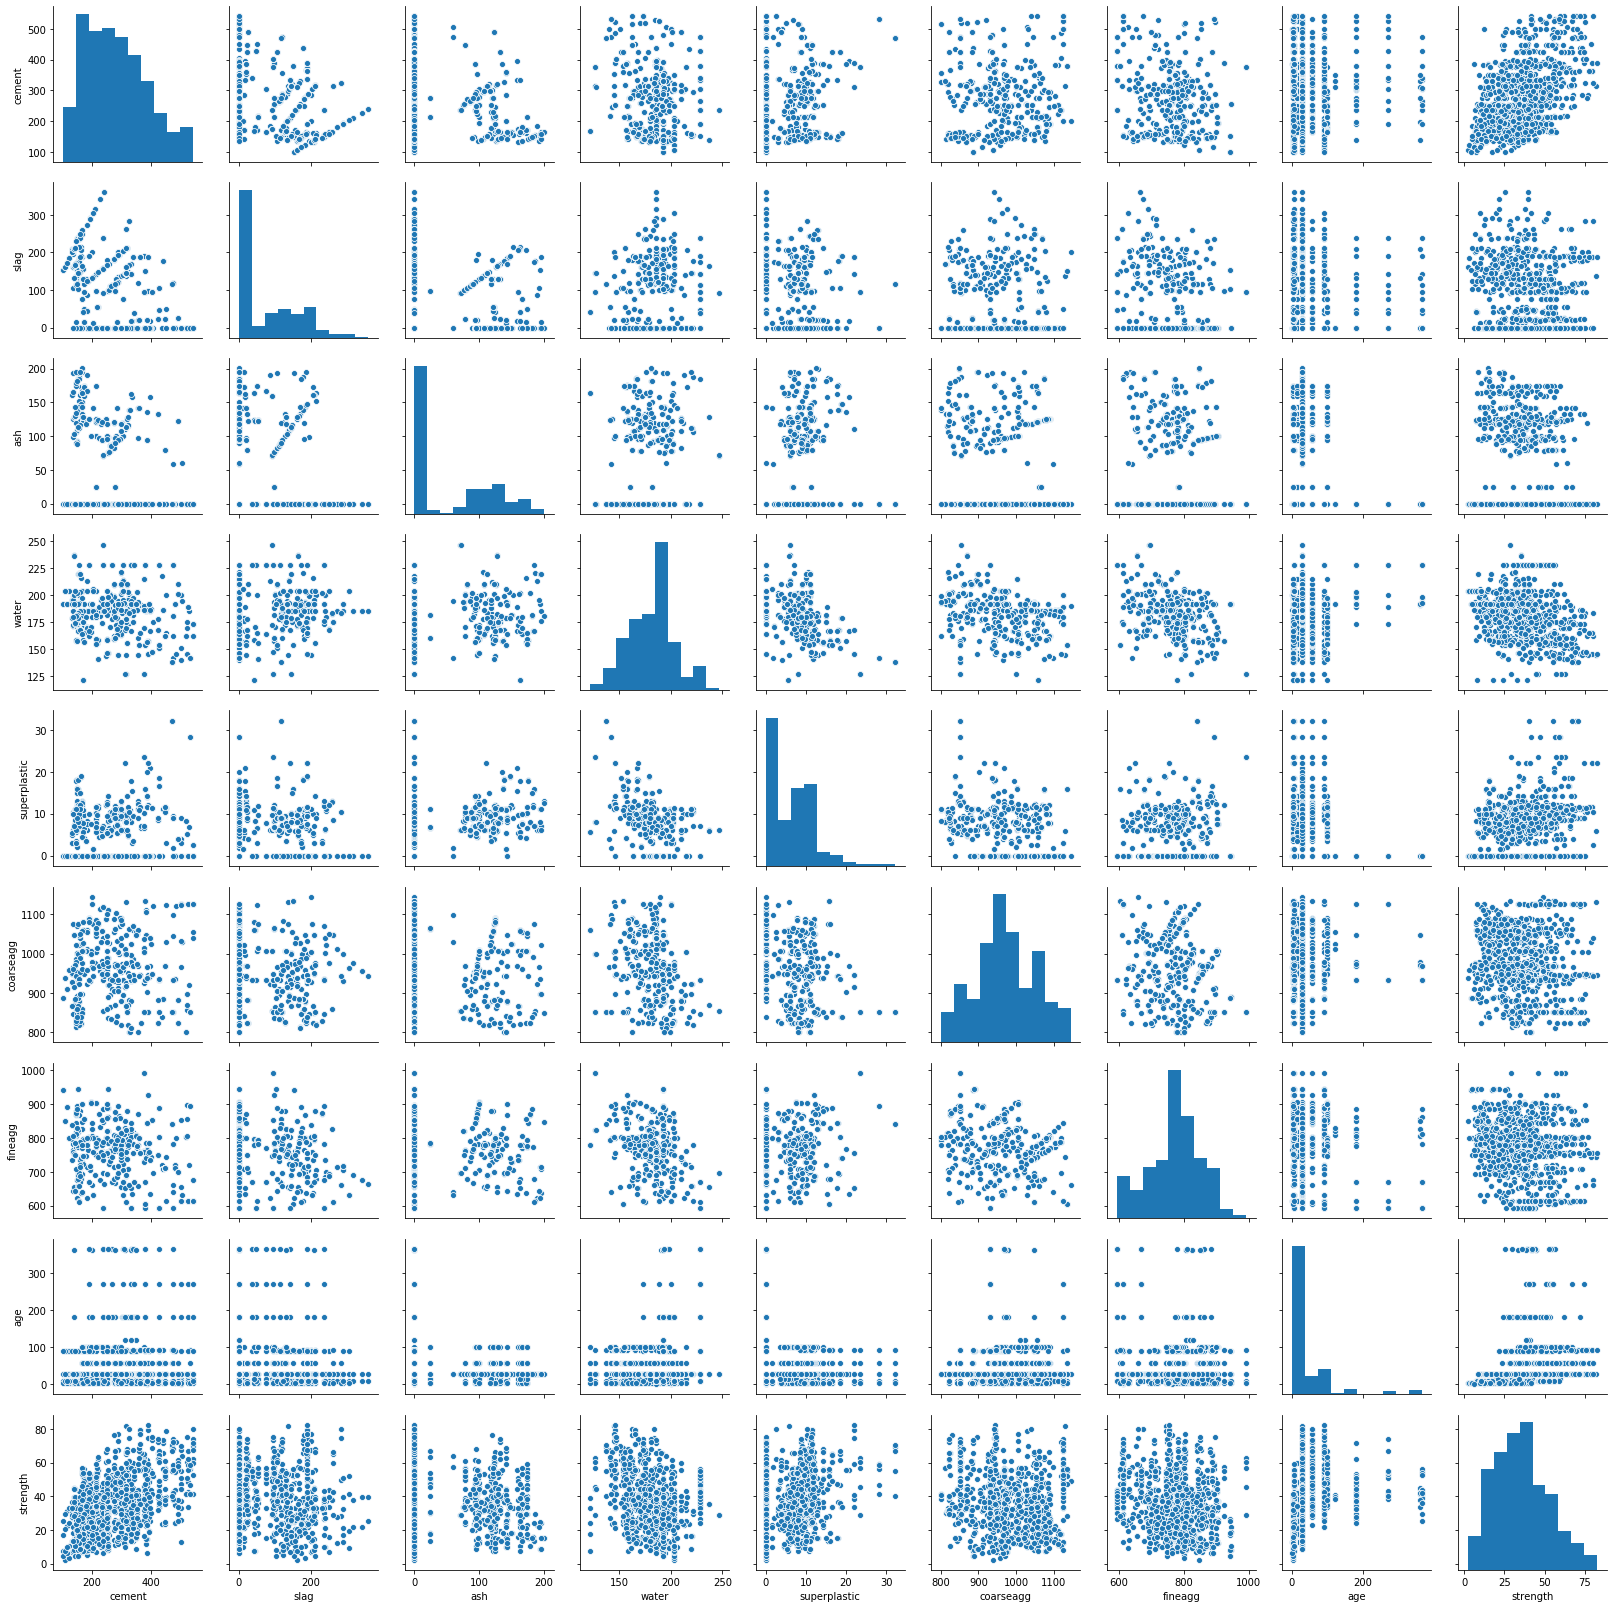

In [43]:
sns.pairplot(dataset)

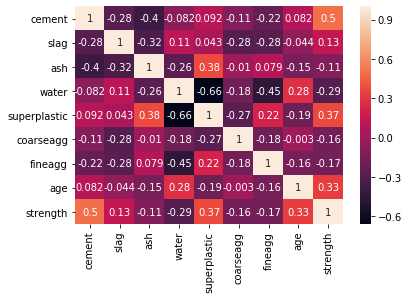

In [42]:
corr=dataset.corr()
sns.heatmap(corr,annot=True)

**Cement has strong positive correlation with Strength. But when ash is added to the mix, the strength decreases. Correlation between Cement and Ash shows that some people are using ash in the place of cement. SO BEWARE of FRAUD :D**

**Some people are using slag instead of cement. Slag is not contributing as much strength that cement provides**

**When we are adding coarseagg, need for cement is comparatively less. Intuitively coarseagg add strength to the concrete, but the correlation says it's negatively impacting. We need to investigate whether any other factors impacting this property**

**Ash and Super Plastics are combinely giving stregth to  concrete. We need to explore advantages using this technology and cost reductions associated with this** 

**fineagg and superplastic has pistive correlation while coarseagg and superplastic has negetive correlation.** 

**Dataset says water has negetive impact on strength of concrete**

**When coarseagg is used along with slag, it has negetive impact on strength of concrete.**

**When we are using fineagg, the amount of water being used should be lower than when we are using coarseagg. Correlation between fineagg and strength is negetive. We need to confirm that whether this is due to the impact of other features like water** 

**Age and Strength together points to the durability of concrete. Age and Water has positive correlation and Age and Strength has positive correlation. This is contradictory to the water and strength negetive correlation. NEED TO INVESTIGATE**



### Transform the column values for ash, superplastic,slag etc into different value ranges and investigate strength

In [46]:
dataset["ash_usage"] = dataset.apply(lambda x: 'Not Used' if x["ash"] == 0 else 'Low' if  x["ash"] < 75 else 'Medium' if x["ash"] > 75 and x["ash"]< 150 else 'High', axis = 1 )

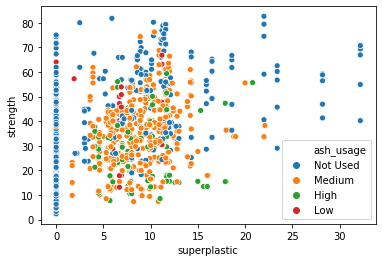

In [47]:
sns.scatterplot(x=dataset["superplastic"], y=dataset["strength"], hue=dataset["ash_usage"] )

**Even in the presence of superplastic, the usage of ash badly impacted the strength of concrete. The highest strength was achieved without the usage of ash**

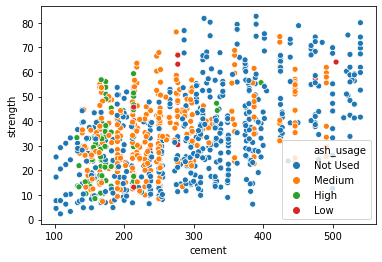

In [48]:
sns.scatterplot(x=dataset["cement"], y=dataset["strength"], hue=dataset["ash_usage"] )

**The strength is low when ash is being used along with cement**

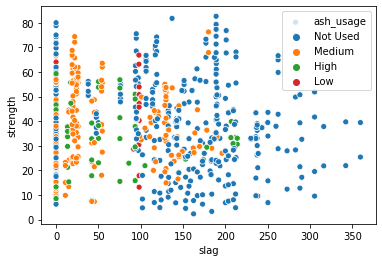

In [49]:
sns.scatterplot(x=dataset["slag"], y=dataset["strength"], hue=dataset["ash_usage"] )

**When we are using slag in low amounts, adding moderate amount of ash will not impact the strength of Concrete much**

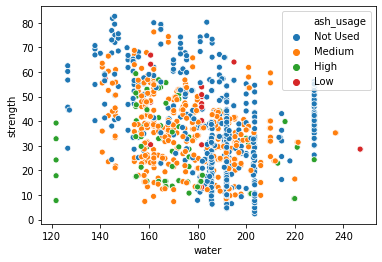

In [50]:
sns.scatterplot(x=dataset["water"], y=dataset["strength"], hue=dataset["ash_usage"] )

In [51]:
dataset["slag_usage"] = dataset.apply(lambda x: 'Not Used' if x["slag"] == 0 else 'Low' if  x["ash"] < 30 else 'Medium' if x["ash"] > 30 and x["ash"]< 100 else 'High', axis = 1 )

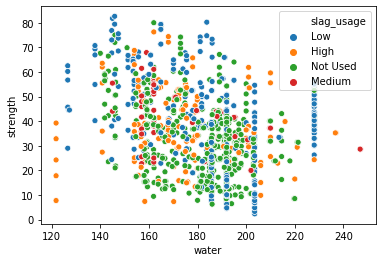

In [52]:
sns.scatterplot(x=dataset["water"], y=dataset["strength"], hue=dataset["slag_usage"] )

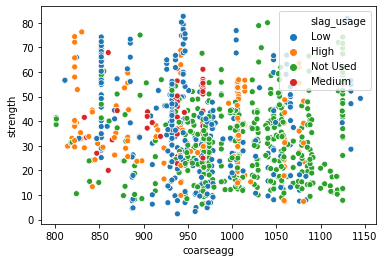

In [53]:
sns.scatterplot(x=dataset["coarseagg"], y=dataset["strength"], hue=dataset["slag_usage"] )

**Most of the time, when coarseagg are used in big quantities, there is a trend to avoid slag**

**The plot shows another fact that the strength was higher when we use 800-950 units of coarseagg with low usage of slag**

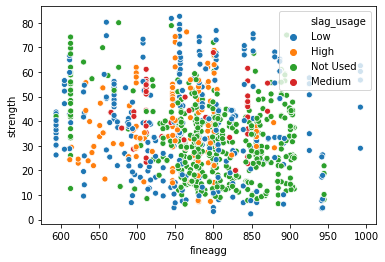

In [55]:
sns.scatterplot(x=dataset["fineagg"], y=dataset["strength"], hue=dataset["slag_usage"] )

**Adding low amount of slag with fineagg seem to improve strength of concrete**  

## Check for outliers

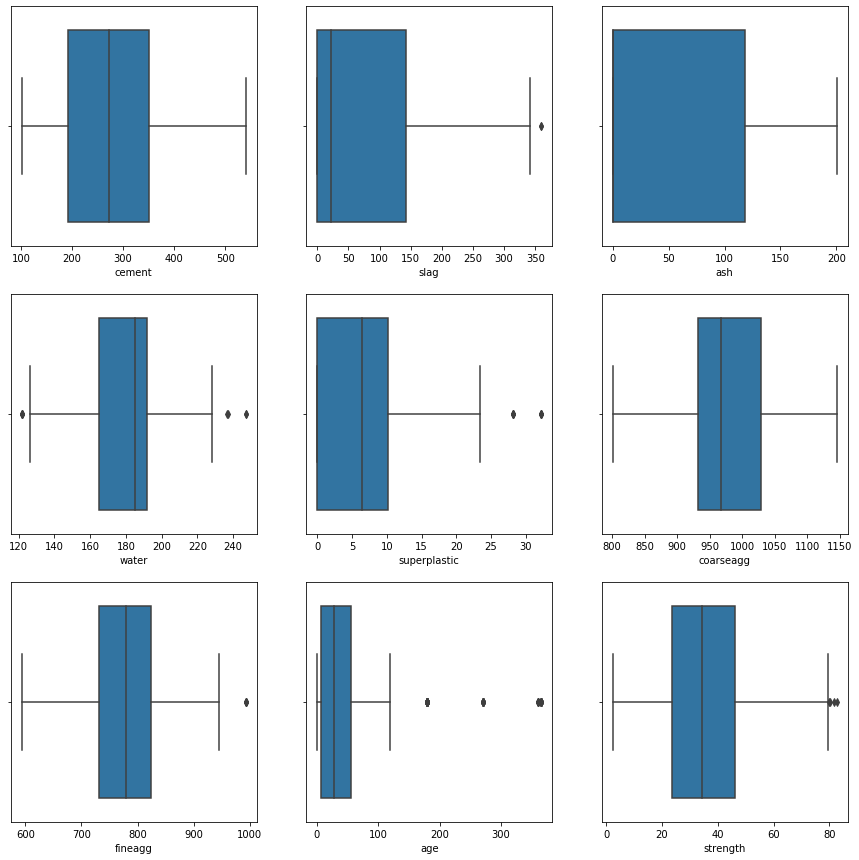

In [58]:
f,axes = plt.subplots(3,3,figsize=(15,15))
sns.boxplot(dataset["cement"],ax=axes[0,0])
sns.boxplot(dataset["slag"],ax=axes[0,1])
sns.boxplot(dataset["ash"],ax=axes[0,2])

sns.boxplot(dataset["water"],ax=axes[1,0])
sns.boxplot(dataset["superplastic"],ax=axes[1,1])
sns.boxplot(dataset["coarseagg"],ax=axes[1,2])

sns.boxplot(dataset["fineagg"],ax=axes[2,0])
sns.boxplot(dataset["age"],ax=axes[2,1])
sns.boxplot(dataset["strength"],ax=axes[2,2])

**Outliers exist in slag, water, superplastic, fineagg and age**

**We need to handle outliers using different methods and get the best results with low standard deviation**

## Training and Testing

In [165]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# module for splitting the entire dataset into training and testing dataset
from sklearn.model_selection import train_test_split

#import LinearRegression Model
from sklearn.linear_model import LinearRegression

#import LogisticReGression Model
from sklearn.linear_model import ElasticNet


#import KNN model
from sklearn.neighbors import KNeighborsRegressor

#import SVM model
from sklearn.svm import SVR

#Import metrics modulel to calculate model performance
from sklearn import metrics

#import resample module for upsampling
from sklearn.utils import resample

# module for evaluating the feature dependecies with target variable
import statsmodels.formula.api as sm

# module for cross validation
from sklearn.model_selection import cross_val_score 

# module for AUC-ROC Calculation
from sklearn.metrics import roc_curve, auc,r2_score

# module for SVM hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# module for ensembled models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor,GradientBoostingRegressor,ExtraTreesRegressor

# module for decision tree
from sklearn.tree import DecisionTreeRegressor

# 
from xgboost import XGBRegressor

from catboost import CatBoostRegressor

import lightgbm as lgb

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import random

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

class tuning_params:
    def __init__(self):
        self.random_forest = None
        self.adaboost = None
        self.svm = None
        
class feature_selection:
    def __init__(self, features):
        self.feature_importance_metrics = pd.DataFrame()
        self.feature_importance_metrics["features"] = features
        self.feature_importance_metrics["NetImportance"] = np.zeros(features.length)
        
    def add_to_metrics(self,feature_importance,model_name):
        self.feature_importance_metrics = pd.merge(self.feature_importance_metrics,feature_importance,on=["features"])
        self.feature_importance_metrics["NetImportance"] = self.feature_importance_metrics.apply(lambda x: (x["NetImportance"] + x[model_name])/2)
        
    def get_features(self, threshold):
        return self.feature_importance_metrics[(self.feature_importance_metrics["NetImportance"]>threshold)]["features"]
    


hyperparams = tuning_params()

def drop_columns(df, col_names,inplace=False):
    print("--------Dropping columns-----")
    return df.drop(col_names,inplace = inplace, axis=1)
 
    
def get_features_and_target(df,target_column_name):
    X=df.drop([target_column_name],axis=1)
    y=df[target_column_name]    
    return X,y

def get_onehot_encoded_features(X):
    categoryList = list(X.select_dtypes(include=['object']).columns)
    dummies = pd.get_dummies(X[categoryList], prefix= categoryList)
    X.drop(categoryList, axis=1, inplace = True)
    X=pd.concat([X,dummies], axis =1)
    return X

def random_forest_hyperparams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 20, num = 5)] ## change 10,20 and 2
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10,15]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4,10]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    return n_estimators, max_features,max_depth, min_samples_split, min_samples_leaf, bootstrap

def adaboost_hyperparams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)] ## play with start and stop

    learning_rate = [1,0.1,0.01,0.001,0.5,0.05,0.005]

    return n_estimators, learning_rate
    

def get_model_turning_params(modelname):
    
    TUNING_PARAM_VALUES = {
        "random_forest":
            random_forest_hyperparams(),           
        
        "ada_boost":
            adaboost_hyperparams()
    }
        
    return TUNING_PARAM_VALUES.get(modelname)
        
        
def initalize_tuning_params():
    
    tuning_params_svm = {'C': [1,0.01,0.05,1], 'gamma': [1,0.1,0.01,0.002,0.0005,0.001,0.0001], 'kernel': ['rbf','linear']}
    
    n_estimators, max_features,max_depth, min_samples_split, min_samples_leaf, bootstrap = get_model_turning_params("random_forest")
    tuning_params_randomforest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    
    n_estimators, learning_rate = get_model_turning_params("ada_boost")
    tuning_params_adaboost = {'n_estimators': n_estimators,
               'max_features': max_features,
               'learning_rate': learning_rate}
    
    hyperparams.random_forest = tuning_params_randomforest
    hyperparams.adaboost = tuning_params_adaboost
    hyperparams.svm = tuning_params_svm


def handle_missing_values(df, mode):
    MISSING_VALUE_HANDLER ={
        "median": df.fillna(df.median()),
        
        "mode": df.fillna(df.median()),
        
        "mean": df.fillna(df.mean())
    }

    return MISSING_VALUE_HANDLER.get(mode)



In [110]:
class model_performance_metrics:
    def __init__(self, model_name):
        self.model_name = model_name
        self.metrics = collections.defaultdict(float)        
    
    def add_metrics(self, key:str, value:float):
        self.metrics[key] = value
        
    def get_performance_metrics(self):
        return pd.DataFrame(self.metrics,index=[0])
        

In [163]:
def evaluate_model_performance(name,model,X_train,y_train,X_test,y_test,have_coef=True):
    model.fit(X_train, y_train)
    print("\n")
    print("Model train score is: ", model.score(X_train, y_train))
    
    if(have_coef):
        
        print("Model Coefficients:")
        print(model.coef_)
    
        print("\n")
        print("Intercept", model.intercept_)
        print("\n \n")
    print("#####################  Training Completed ######################## \n \n")
    
    y_pred = model.predict(X_test)
    
    metric = model_performance_metrics(name)
    metric.add_metrics("R2",metrics.r2_score(y_test,y_pred))
    metric.add_metrics("Adjusted R2",1-(1-metrics.r2_score(y_test,y_pred))*((len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
    metric.add_metrics("MAE",metrics.mean_absolute_error(y_test,y_pred))
    metric.add_metrics("MSE",metrics.mean_squared_error(y_test,y_pred))
    metric.add_metrics("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    metric.add_metrics("Explained Variance",metrics.explained_variance_score(y_test,y_pred))
    
    print("Cross validation score:\n \n")
    accuracies= cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,scoring='explained_variance') 
    accuracies_mean=accuracies.mean()*100
    print("Mean Accuracy:",accuracies_mean)

    accuracies_std=accuracies.std()*100
    print("Standard Deviation:",accuracies_std)
    
    print("\n \n")
    
    metric_df= metric.get_performance_metrics()
    
    print(metric_df)
    
    print("\n \n #####################  Testing Completed ########################")
    

In [158]:
def evaluate_bestK(X_train,y_train, X_test, y_test):
    error_rate = []

    for i in range(1,50):
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.sqrt(metrics.mean_squared_error(y_test,pred_i)))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50), error_rate,color = "green", linestyle="dashed", marker = "o", markerfacecolor='red',markersize=10)
    plt.title("Error Rate vs K")
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    plt.show()
    
    print("Best K value is: ", error_rate.index(min(error_rate)) + 1)
    
    return error_rate.index(min(error_rate)) + 1

In [159]:
def do_hyperparams_tuning_svm(X_train,y_train, X_test, y_test):
    param_grid = {'C': [1,0.01,0.05,1], 'gamma': [1,0.1,0.01,0.002], 'kernel': ['rbf','linear']}
    model = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
    model.fit(X_train,y_train)
    return model.best_estimator_

In [145]:
def evaluate_randomforest_performance(X_train,y_train, X_test, y_test,criterion):
    model = RandomForestRegressor(n_estimators = 10, criterion=criterion)    
    evaluate_model_performance("RandomForest", model, X_train,y_train, X_test, y_test,False)
    
def do_hyperparms_tuning_rf(X_train,y_train, X_test, y_test):
    model = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = hyperparams.random_forest, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
    
    model.fit(X_train,y_train)
    return model.best_estimator_

In [168]:
def evaluate_svm_performance(X_train,y_train, X_test, y_test):  
    svc_model = SVR()
    evaluate_model_performance("SVM", svc_model, X_train, X_test, y_train, y_test)

def evaluate_adaboost_performance(X_train,y_train, X_test, y_test):
    model = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators = 3, learning_rate = 0.001)
    evaluate_model_performance("AdaBoost", model, X_train,y_train, X_test,  y_test,False)
    
def evaluate_gradientboost_performance(X_train,y_train, X_test, y_test):
    model = GradientBoostingRegressor(learning_rate=0.01,random_state=1)
    evaluate_model_performance("GradientBoost", model, X_train, y_train, X_test, y_test,False)
    
def evaluate_metabagging_performance(X_train,y_train, X_test, y_test):
    model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
    evaluate_model_performance("MetaBagging", model, X_train,y_train, X_test,  y_test,False)

### Load Dataset

In [80]:
concrete_df = pd.read_csv("concrete.csv")

In [81]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Get feautures and target

In [254]:
X, y = get_features_and_target(concrete_df,"strength")

In [83]:
X.shape

(1030, 8)

In [84]:
y.shape

(1030,)

### Check for missing values

In [85]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**Dataset contains no missing values**

### Split dataset into training and testing data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

### Running models with raw dataset

#### Linear Regression

In [108]:
evaluate_model_performance("Linear Regression",LinearRegression(),X_train,y_train,X_test,y_test)



Model train score is:  0.6245192848718453
Model Coefficients:
[ 0.11233527  0.09110295  0.08073995 -0.15741394  0.38714635  0.01361319
  0.01460262  0.11842164]


Intercept -10.498307216991293

 

#####################  Training Completed ######################## 
 

         R2  Adjusted R2       MAE         MSE       RMSE  Explained Variance
0  0.584797     0.573725  8.180855  112.130648  10.589176            0.585665

 
 #####################  Testing Completed ########################


#### KNN

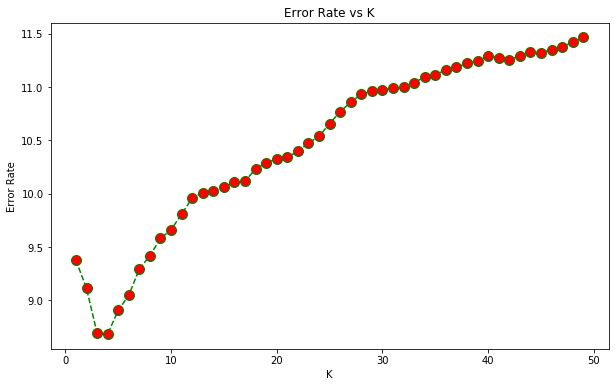

Best K value is:  4


In [116]:
k=evaluate_bestK(X_train,y_train,X_test,y_test)

In [117]:
model = KNeighborsRegressor(n_neighbors =4 )

In [124]:
evaluate_model_performance("KNN",model,X_train,y_train,X_test,y_test,have_coef=False)



Model train score is:  0.8234516224038471
#####################  Training Completed ######################## 
 

         R2  Adjusted R2      MAE        MSE      RMSE  Explained Variance
0  0.720724     0.713276  6.52843  75.422033  8.684586            0.720834

 
 #####################  Testing Completed ########################


In [122]:
X_test.shape[1]

8

#### SVR

In [126]:
evaluate_model_performance("SVR",SVR(),X_train,y_train,X_test,y_test,False)



Model train score is:  0.11141835184431492
#####################  Training Completed ######################## 
 

         R2  Adjusted R2        MAE         MSE       RMSE  Explained Variance
0  0.032791     0.006999  12.899607  261.206725  16.161891            0.033067

 
 #####################  Testing Completed ########################


#### SVR with Hyperparameter tuning

In [130]:
model = do_hyperparams_tuning_svm(X_train,y_train,X_test,y_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.010, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.013, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.008, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=1, kernel=linear, score=0.464, total=   4.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.628, total=   5.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.534, total=   2.7s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.015, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.019, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.012, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.464, total=   4.6s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.471, total=   0.3s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.622, total=   0.3s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.528, total=   0.2s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] .... C=0.05, gamma=0.002, kernel=rbf, score=-0.002, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.002, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.000, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=linear ..............................
[CV] .. C=0.05, gamma=0.002, kernel=linear, score=0.471, total=   0.3s
[CV] C=0.05, gamma=0.002, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  1.9min finished


**Best params:**

In [133]:
model

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [136]:
evaluate_model_performance("SVR(after hyperparam tuning)",model,X_train,y_train,X_test,y_test,False)



Model train score is:  0.5676894685155636
#####################  Training Completed ######################## 
 

         R2  Adjusted R2       MAE         MSE       RMSE  Explained Variance
0  0.504944     0.491742  8.186202  133.696049  11.562701            0.509935

 
 #####################  Testing Completed ########################


#### Random Forest

In [146]:
evaluate_randomforest_performance(X_train,y_train,X_test,y_test,criterion="mse")



Model train score is:  0.9769660909826788
#####################  Training Completed ######################## 
 

         R2  Adjusted R2       MAE        MSE      RMSE  Explained Variance
0  0.882679     0.879551  3.744119  31.683875  5.628843            0.883505

 
 #####################  Testing Completed ########################


#### Random Forest(with hyper parameter tuning)

In [148]:
initalize_tuning_params()

In [149]:
model = do_hyperparms_tuning_rf(X_train,y_train,X_test,y_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.7s finished


In [150]:
model


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=162,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [164]:
evaluate_model_performance("Random FOrest(after hyperparam tuning)",model,X_train,y_train,X_test,y_test,False)



Model train score is:  0.983499660053982
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 89.50090737486566
Standard Deviation: 2.6480941948528343

 

         R2  Adjusted R2       MAE        MSE      RMSE  Explained Variance
0  0.901771     0.899152  3.376311  26.527941  5.150528            0.902103

 
 #####################  Testing Completed ########################


#### Adaboost

In [169]:
evaluate_adaboost_performance(X_train,y_train, X_test, y_test)



Model train score is:  0.9738970082361005
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 83.1990215768197
Standard Deviation: 4.580383859588856

 

         R2  Adjusted R2       MAE        MSE      RMSE  Explained Variance
0  0.846453     0.842359  4.160777  41.467184  6.439502            0.846719

 
 #####################  Testing Completed ########################


#### GradientBoost

In [170]:
evaluate_gradientboost_performance(X_train,y_train, X_test, y_test)



Model train score is:  0.638953715517972
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 61.28123458162952
Standard Deviation: 3.624869591773027

 

         R2  Adjusted R2       MAE         MSE       RMSE  Explained Variance
0  0.584965     0.573897  8.353188  112.085386  10.587039            0.585688

 
 #####################  Testing Completed ########################


#### Meta Bagging

In [171]:
evaluate_metabagging_performance(X_train,y_train, X_test, y_test)



Model train score is:  0.9772877279507823
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 87.6295954594142
Standard Deviation: 1.7598861143641416

 

         R2  Adjusted R2       MAE        MSE      RMSE  Explained Variance
0  0.892459     0.889591  3.537132  29.042789  5.389136            0.892672

 
 #####################  Testing Completed ########################


## Feature Selection

### Feature Selection based on Correlation

**By looking at the pairplot or checking the dataste correlation, we can check the liniear relationship between independent features and Target variables**

In our dataset Cement and Superplastic has strong positive correlation with Strength. Water has negetive correlation with Strength. These are the 3 main predictors for strength. Since Correlation technique capture only linear relationship, we cannot depend on this

### Recursive Feature Elimination

In [173]:
y.shape


(1030,)

In [180]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X_norm = MinMaxScaler().fit_transform(X)

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=5, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 8 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=10, verbose=5)

In [181]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

5 selected features


In [182]:
rfe_feature

['cement', 'slag', 'ash', 'water', 'age']

### ElasticNet

In [197]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [210]:
def select_features_usiing_elasticnet():
    alphas = [0.03, 0.05, 0.1, 0.15,0.25,0.5, 1.0]
    l1_ratios = [1.5, 1.1, 1, 0.9, 0.8, 0.7,0.6, 0.5]
    
    cv_elastic = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio=l1_ratio)).mean() 
            for (alpha, l1_ratio) in zip(alphas, l1_ratios)]
    print(cv_elastic)
    
    plt.subplots(figsize=(10,10))
    idx = list(zip(alphas, l1_ratios))
    p_cv_elastic = pd.Series(cv_elastic, index = idx)
    p_cv_elastic.plot(title = "Validation - Just Do It")
    plt.xlabel("alpha - l1_ratio")
    plt.ylabel("rmse")
    

[10.474212411327505, 10.47417701581095, 10.474126120088608, 10.4740699671879, 10.473976679731612, 10.473864262043117, 10.473963791601983]


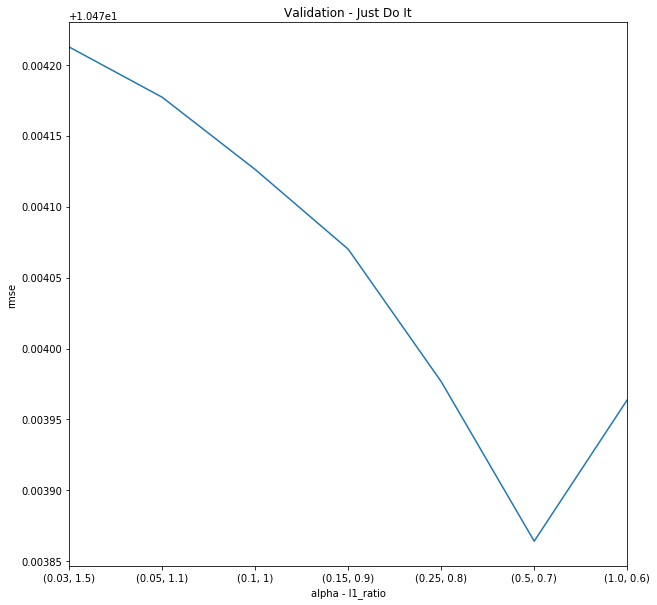

In [211]:
select_features_usiing_elasticnet()

In [212]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.7)

In [213]:
elastic.fit(X, y)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [218]:
coef=pd.Series(elastic.coef_, index = X_train.columns)

In [223]:
imp_coef = pd.concat([coef.sort_values().head(4),
                     coef.sort_values().tail(4)])

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

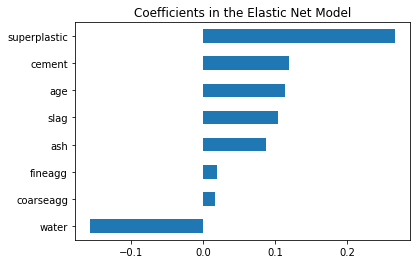

In [224]:
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

## Check for multi-collinearity

**TODO: NOT IMPLEMENTED DUE TO TIME CONSTRAINTS**

**Check the VIF score among the independent features.**
**If the VIF score between two independent variables are high, that means multi-collinearity exists between those features.**

**Apply PCA to get rid of multi-collinearity among X values** 

## Retrain the Models using sub-features(cement,superplastic,age,slag,ash,water)

In [255]:
X = X[["cement","ash","age","slag","water"]]

In [256]:
X.shape

(1030, 5)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#### Linear Regression

In [258]:
evaluate_model_performance("Linear Regression",LinearRegression(),X_train,y_train,X_test,y_test)



Model train score is:  0.6172524048536256
Model Coefficients:
[ 0.10886958  0.08288473  0.11941304  0.08692012 -0.26132078]


Intercept 36.42837213679244

 

#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 60.65299131493529
Standard Deviation: 7.646520703597896

 

         R2  Adjusted R2       MAE         MSE       RMSE  Explained Variance
0  0.588831     0.582046  8.186043  111.041157  10.537607            0.589647

 
 #####################  Testing Completed ########################


#### KNN

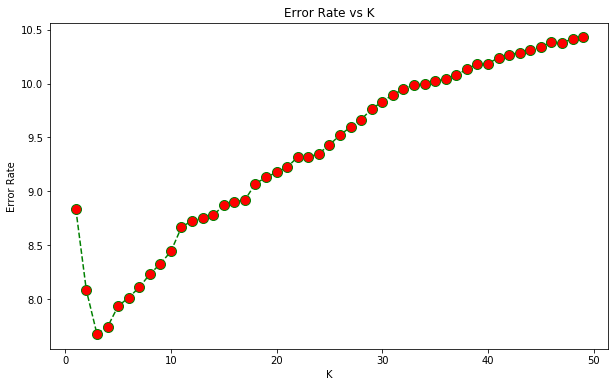

Best K value is:  3


In [259]:
k=evaluate_bestK(X_train,y_train,X_test,y_test)

In [260]:
model = KNeighborsRegressor(n_neighbors =4 )

In [261]:
evaluate_model_performance("KNN",model,X_train,y_train,X_test,y_test,have_coef=False)



Model train score is:  0.884515554697244
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 75.25576046411679
Standard Deviation: 4.863450403527865

 

         R2  Adjusted R2       MAE        MSE    RMSE  Explained Variance
0  0.778108     0.774447  5.691828  59.924622  7.7411            0.778231

 
 #####################  Testing Completed ########################


#### SVR

In [262]:
model = do_hyperparams_tuning_svm(X_train,y_train,X_test,y_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.015, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.020, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.014, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=1, kernel=linear, score=0.432, total=   3.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.648, total=   1.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.525, total=   2.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.021, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.029, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.020, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.432, total=   3.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.432, total=   0.2s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.648, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.526, total=   0.1s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.003, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.009, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.006, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=linear ..............................
[CV] .. C=0.05, gamma=0.002, kernel=linear, score=0.432, total=   0.1s
[CV] C=0.05, gamma=0.002, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  1.1min finished


In [266]:
evaluate_model_performance("SVR(after hyperparam tuning)",model,X_train,y_train,X_test,y_test,False)



Model train score is:  0.9918031102052417
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 89.54728762312828
Standard Deviation: 2.8659200679206425

 

        R2  Adjusted R2       MAE        MSE     RMSE  Explained Variance
0  0.89574     0.894019  3.375697  28.156712  5.30629            0.896266

 
 #####################  Testing Completed ########################


#### Random Forest (with hyperparamerter tuning)

In [264]:
initalize_tuning_params()
model = do_hyperparms_tuning_rf(X_train,y_train,X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   13.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.6s finished


In [267]:

evaluate_model_performance("Random FOrest(after hyperparam tuning)",model,X_train,y_train,X_test,y_test,False)



Model train score is:  0.9919684994423058
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 89.30623186036426
Standard Deviation: 2.9476530095535547

 

         R2  Adjusted R2       MAE        MSE      RMSE  Explained Variance
0  0.896274     0.894562  3.365556  28.012534  5.292687            0.896849

 
 #####################  Testing Completed ########################


#### Adaboost

In [268]:
evaluate_adaboost_performance(X_train,y_train, X_test, y_test)



Model train score is:  0.9701057586508816
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 81.942444748297
Standard Deviation: 2.4689088954088647

 

         R2  Adjusted R2       MAE        MSE      RMSE  Explained Variance
0  0.843342     0.840757  4.317104  42.307408  6.504415            0.843513

 
 #####################  Testing Completed ########################


#### Gradient Boost

In [269]:
evaluate_gradientboost_performance(X_train,y_train, X_test, y_test)



Model train score is:  0.6288253522378235
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 60.23236253212203
Standard Deviation: 3.633840473399108

 

         R2  Adjusted R2       MAE         MSE       RMSE  Explained Variance
0  0.574634     0.567614  8.493039  114.875404  10.717994             0.57567

 
 #####################  Testing Completed ########################


#### Meta Baggibg

In [270]:
evaluate_metabagging_performance(X_train,y_train, X_test, y_test)



Model train score is:  0.976048231117455
#####################  Training Completed ######################## 
 

Cross validation score:
 

Mean Accuracy: 87.98589951080928
Standard Deviation: 2.5066821648336273

 

         R2  Adjusted R2       MAE        MSE     RMSE  Explained Variance
0  0.883764     0.881846  3.789379  31.390925  5.60276            0.884544

 
 #####################  Testing Completed ########################


## Summary

### Technical Summary

#### Random forest performed very well against this dataset. ####

R2  - 0.896274

Adjusted R2 - 0.894562

MAE  - 3.365556      

MSE  - 28.012534    

RMSE - 5.292687

Explained Variance - 0.896849

Standard Deviation(CV): 2.95%



#### The model predicts the strength of concrete with atleast 87% accuracy(89.45 (+-)2.95)

### Non-Technical Summary

**Cement has strong positive correlation with Strength. But when ash is added to the mix, the strength decreases. Correlation between Cement and Ash shows that some people are using ash in the place of cement. SO BEWARE of FRAUD :D**

**Some people are using slag instead of cement. Slag is not contributing as much strength that cement provides**

**When we are adding coarseagg, need for cement is comparatively less. Intuitively coarseagg add strength to the concrete, but the correlation says it's negatively impacting. We need to investigate whether any other factors impacting this property**

**Ash and Super Plastics are combinely giving stregth to concrete. We need to explore advantages using this technology and cost reductions associated with this**

**fineagg and superplastic has pistive correlation while coarseagg and superplastic has negetive correlation.**

**Dataset says water has negetive impact on strength of concrete**

**When coarseagg is used along with slag, it has negetive impact on strength of concrete.**

**When we are using fineagg, the amount of water being used should be lower than when we are using coarseagg. Correlation between fineagg and strength is negetive. We need to confirm that whether this is due to the impact of other features like water**

**Age and Strength together points to the durability of concrete. Age and Water has positive correlation and Age and Strength has positive correlation. This is contradictory to the water and strength negetive correlation. NEED TO INVESTIGATE**